In [1]:
import rasterio
from matplotlib import pyplot
import folium

In [2]:
raster = rasterio.open('data/forest/Forest_height_2019_SAM.tif')

print('raster shape :', raster.shape)

# row, col = raster.index(x, y)
# x, y = raster.xy(row, col)

x1, y1 = raster.xy(0, 0) 
print(x1, y1)

x2, y2 = raster.xy(raster.shape[1], raster.shape[0]) 
print(x2, y2)

map = folium.Map(location=[(y1+y2)/2, (x1+x2)/2], zoom_start=3)

folium.Rectangle([(y1, x1), (y2, x2)]).add_to(map)

map


raster shape : (276004, 216004)
-88.000375 13.000375
-18.999375 -41.000625


In [3]:
band = raster.read(1)

In [4]:
x1 = -83.934971      #  area vicino la costa
y1 = 3.375746
x2 = -72.514180
y2 = -2.242581
zoom_start = 6

# x1 = -75.085558        # area di città
# y1 = 0.051871
# x2 = -74.451375
# y2 = -0.340598
# zoom_start = 10

In [5]:
map = folium.Map(location=[(y1+y2)/2, (x1+x2)/2], zoom_start=zoom_start)

folium.Rectangle([(y1, x1), (y2, x2)]).add_to(map)

map

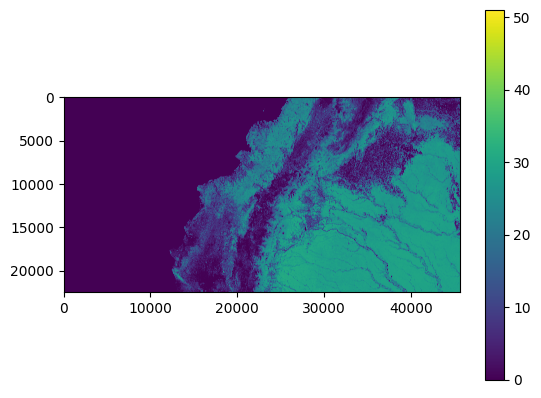

In [6]:
row1, col1 = raster.index(x1, y1)
row2, col2 = raster.index(x2, y2)

area = band[row1:row2, col1:col2]

# drop 101, 102, 103 values (to be explored further)
area[area > 100] = 0

img = pyplot.imshow(area)
pyplot.colorbar(img)
pyplot.show()